In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
results = pd.read_csv('calibration_results.csv').drop(columns='Unnamed: 0')

In [3]:
results.loc[results.true_outcomes == 0].trans_prob_p_int.mean()

0.6297868964663678

In [5]:
results['p_int_pre_lambda'] = results['trans_prob_p_int'] ** 4
display(results)
results.loc[results.true_outcomes == 1].p_int_pre_lambda.mean()

,gameId,playId,trans_prob_p_int,true_outcomes,p_int_pre_lambda
0,2018100400,51,0.575605,1,0.109773
1,2018100400,117,0.777094,1,0.364665
2,2018100400,145,0.770925,1,0.353223
3,2018100400,169,0.901023,1,0.659088
4,2018100400,197,0.874968,1,0.586097
...,...,...,...,...,...
916,2018100800,3540,0.775963,1,0.362547
917,2018100800,3568,0.732154,1,0.287349
918,2018100800,3757,0.803803,1,0.417445
919,2018100800,3806,0.694690,1,0.232897


0.46808288689442756

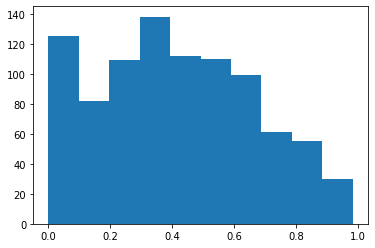

In [59]:
#plt.figure(figsize=(25, 5))
#plt.plot(results['p_int_pre_lambda'])
plt.hist(results['p_int_pre_lambda'])
plt.show()

[0.         0.09830421 0.19660842 0.29491264 0.39321685 0.49152106
 0.58982527 0.68812948 0.78643369 0.88473791]


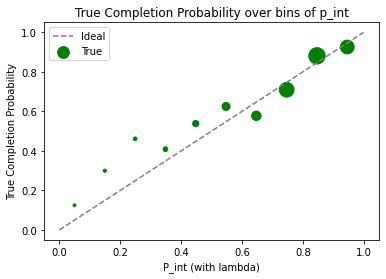

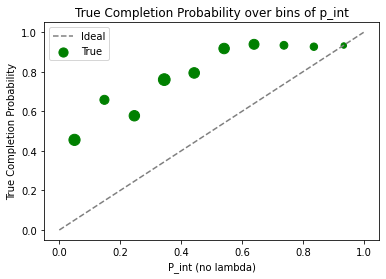

In [89]:
bin_boundaries = np.histogram(results['trans_prob_p_int'])[1][:-1]
results['p_int_bin'] = np.searchsorted(bin_boundaries, results['trans_prob_p_int'], side='right') - 1

bin_boundaries_pre_lambda = np.histogram(results['p_int_pre_lambda'])[1][:-1]
results['p_int_pre_lambda_bin'] = np.searchsorted(bin_boundaries_pre_lambda, results['p_int_pre_lambda'], side='right') - 1
#display(results)

results['true_comp_prob'] = results.groupby('p_int_bin').true_outcomes.transform('mean')
results['true_comp_prob_pre_lambda'] = results.groupby('p_int_pre_lambda_bin').true_outcomes.transform('mean')

true_probs = results.groupby('p_int_bin').true_comp_prob.unique().values
true_probs_sizes = results.groupby('p_int_bin').size()
true_probs_pre_lambda = results.groupby('p_int_pre_lambda_bin').true_comp_prob_pre_lambda.unique().values
true_probs_pre_lambda_sizes = results.groupby('p_int_pre_lambda_bin').size()

# plot
plt.figure()
plt.title('True Completion Probability over bins of p_int')
plt.xlabel('P_int (with lambda)')
plt.ylabel('True Completion Probability')
plt.scatter(bin_boundaries + 0.05, true_probs, label='True', s=true_probs_sizes, color='g')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Ideal', linestyle='--', color='gray')
plt.legend()

# plot
plt.figure()
plt.title('True Completion Probability over bins of p_int')
plt.xlabel('P_int (no lambda)')
plt.ylabel('True Completion Probability')
plt.scatter(bin_boundaries_pre_lambda + 0.05, true_probs_pre_lambda, label='True', s=true_probs_pre_lambda_sizes, color='g')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Ideal', linestyle='--', color='gray')
plt.legend()

(array([ 7.,  6.,  8., 13., 14., 25., 35., 61., 39., 15.]),
 array([0.        , 0.0979227 , 0.19584539, 0.29376809, 0.39169078,
        0.48961348, 0.58753617, 0.68545886, 0.78338156, 0.88130426,
        0.97922695]),
 <BarContainer object of 10 artists>)

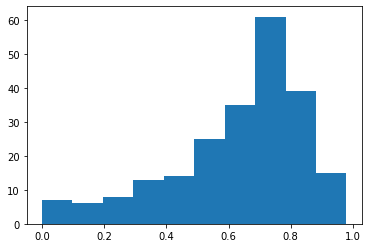

In [24]:
plt.hist(results.loc[results.true_outcomes == 0, 'trans_prob_p_int'])